# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [2]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

In [5]:
!cat ../data/leopoldII/txt/*.txt > ../data/leopoldII/all.txt
!wc ../data/all.txt

    74394  51525537 315039452 ../data/all.txt


## Tokeniser

In [6]:
# Récupération du contenu du fichier
path = "../data/leopoldII/all.txt"

with open(path) as f:
    text = f.read()

In [7]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9006676 words found


In [8]:
words[:10]

['Il', '1', '-', '.', '-', '■', '■', '■', 'r', "'"]

## Calculer la taille du vocabulaire

In [10]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2923288 words kept (383408 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [11]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('bruxelles', 10747),
 ('rue', 10230),
 ('congo', 8763),
 ('cap', 7992),
 ('ord', 7167),
 ('emp', 6866),
 ('fer', 6753),
 ('priv', 6276),
 ('nord', 6167),
 ('anvers', 6161)]

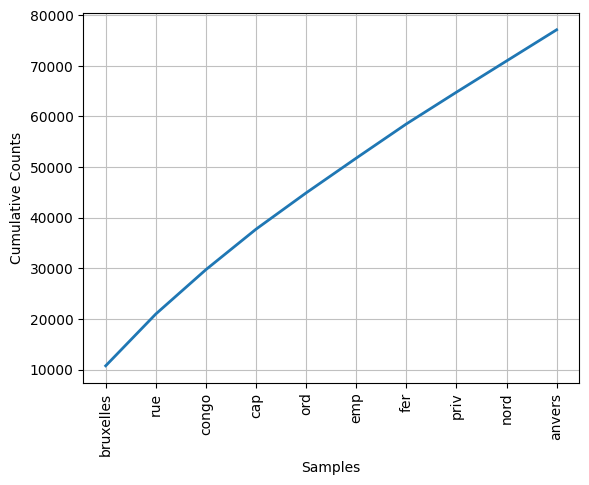

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [13]:
fdist.hapaxes()[:30]

['mazziniste',
 'chalzet',
 'raiscevicl',
 'fénélon',
 'quéniart',
 'victoriub',
 'ambry',
 'jaccovail',
 'francken',
 'backman',
 'rempiles',
 'arasse',
 'canivez',
 'nachtiffau',
 'brossel',
 'bugle',
 'robrechts',
 'cloehes',
 'comeville',
 'muldermans',
 'lustigen',
 'bruisr',
 'vollstedtt',
 'mouzel',
 'sorci',
 'inostensible',
 'réjouissants',
 'srolongement',
 'soumissionnés',
 'stassin']

## Trouver les mots les plus longs du corpus

In [16]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['ictpissesbcraicesbibsssmssbssssïiiiccscxcipskàhîssssssibtâissmîeiimbflbri',
 'wsmstêssissmsmsssmsswsmtssmsswiiàsssmssstttstststsmsissttmtam',
 'ixrirumatlonaeulisuirtkialkolussteiateintimitd',
 'chauderesmultitdbulairbsmsxplosiblesbrevetéess',
 'sepiéscntaitlàapprivoteéauservicederhomine',
 'cetvapeursontdemagniflquesamônagamolitei',
 'cedoublettourspermetdedéterminerlecouri',
 'ccdoublecourspermetdedéterminerlecours',
 'cedoublecourspermetdedeterminerlecours',
 'vousvousexpliquerezfacilementlagrande',
 'cedoublecourspermetdedéterminerlecour',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxmxxxxxxxxm',
 'imawawavhtawhtawawaytawtawawawmawmt',
 'uotentionaccordéeauxétabliasementsd',
 'mbmàamwakmmmmmwawnimmimmminawbnmhns',
 'oùlcsprécédentsfontsûromentdéfaut',
 'âcüêrervorijnpsrossçîesssmtîlîaîî',
 'poficettamsitttfuiiaibefflkairasa',
 'ietiiruuunciituuiauuipiioihnuhtni',
 'jeuneheureusevlelllesseiparceque',
 'cerclesindustrielsetdanslapetite',
 'réetfizacpenfmmfljhanédpkminvvhr',
 'hellangeetaboutissantà